# SNPs + vertical transmission: Sobol sensitivity analysis

In [2]:
from SALib.sample import saltelli, fast_sampler
import pandas as pd
from Sensitivity import Sensitivity
import joblib
model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [14]:
# parameter dictionary
problem = {
    'num_vars': 4,
    'names': ['random-mating', 'genetic-variance', 'vertical-trans-variance', 'fertility-differential'],
    'bounds': [[0, 1.0],
               [0, 0.50],
               [0, 0.50], 
               [0, 0.30]]
}

In [19]:
sample_parameters = False
if (sample_parameters):
    param_values = saltelli.sample(problem, 2**11)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'vertical-trans', 'fertitlity-differential']
    t.to_csv(model_path + "data/param-snp-vt-sobol.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-vt-sobol.csv")

In [4]:
# read data
df = pd.read_csv(output_path + "results-snp-vt-sobol.csv", sep = ";")
print(df.shape)
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-vt-sobol.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_vertical_trans_variance', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]

(16384, 12)


/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_83003/3320049218.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


In [5]:
params.head()

iteration  replicate  init_pop fertility_type mating_type  \
0          1          1      8000       additive    logistic   
1         10          1      8000       additive    logistic   
2        100          1      8000       additive    logistic   
3       1000          1      8000       additive    logistic   
4      10000          1      8000       additive    logistic   

   p_genetic_variance  p_vertical_trans_variance  p_leakage  p_random_mating  \
0            0.156860                   0.367065        0.1         0.000732   
1            0.406860                   0.117065        0.1         0.246826   
2            0.188110                   0.399048        0.1         0.313232   
3            0.210571                   0.332642        0.1         0.864014   
4            0.114136                   0.420776        0.1         0.158447   

   p_fertility_factor  
0                0.25  
1                0.25  
2                0.25  
3                0.25  
4                0.25

## Proportion obese

                               ST   ST_conf
random-mating            0.211875  0.017228
genetic-variance         0.709980  0.041694
vertical-trans-variance  0.146427  0.013582
                               S1   S1_conf
random-mating            0.169671  0.027846
genetic-variance         0.654178  0.045472
vertical-trans-variance  0.114634  0.022076
                                                   S2   S2_conf
(random-mating, genetic-variance)            0.027610  0.036789
(random-mating, vertical-trans-variance)     0.005509  0.034680
(genetic-variance, vertical-trans-variance)  0.020163  0.053818


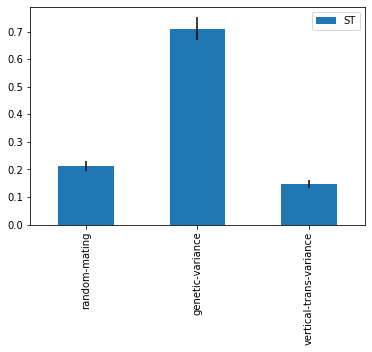

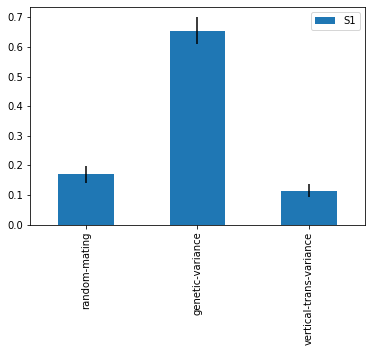

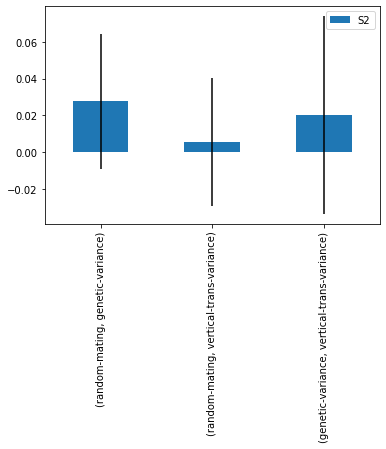

In [6]:
sb = Sensitivity(problem, df['g4'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-vt-sobol-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})
sav = {
    'sb_obese_s1': sb.tabval('S1'),
    'sb_obese_s2': sb.tabval('S2'),
    'sb_obese_st': sb.tabval('ST')
}

## Average BMI

                               ST   ST_conf
random-mating            0.212704  0.014688
genetic-variance         0.710257  0.042122
vertical-trans-variance  0.127493  0.009747
                               S1   S1_conf
random-mating            0.178481  0.025943
genetic-variance         0.668101  0.046356
vertical-trans-variance  0.107497  0.022181
                                                   S2   S2_conf
(random-mating, genetic-variance)            0.024957  0.040956
(random-mating, vertical-trans-variance)     0.006131  0.037493
(genetic-variance, vertical-trans-variance)  0.011899  0.053872


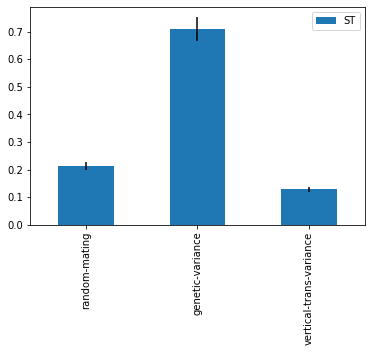

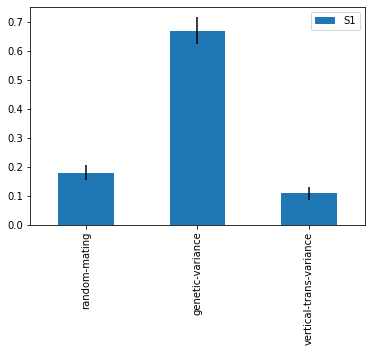

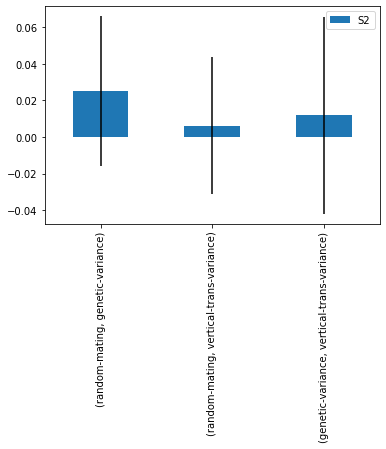

In [7]:
sb = Sensitivity(problem, df['average_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-vt-sobol-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'avearge bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['sb_average_s1'] =  sb.tabval('S1')
sav['sb_average_s2'] =  sb.tabval('S2')
sav['sb_average_st'] =  sb.tabval('ST')

## SD BMI

                               ST   ST_conf
random-mating            0.478295  0.053773
genetic-variance         0.500777  0.049405
vertical-trans-variance  0.614239  0.048927
                               S1   S1_conf
random-mating            0.149402  0.037835
genetic-variance         0.112649  0.043887
vertical-trans-variance  0.239524  0.051086
                                                   S2   S2_conf
(random-mating, genetic-variance)            0.087534  0.059602
(random-mating, vertical-trans-variance)     0.107392  0.060958
(genetic-variance, vertical-trans-variance)  0.161767  0.064214


['sobol-snp-vt.pkl']

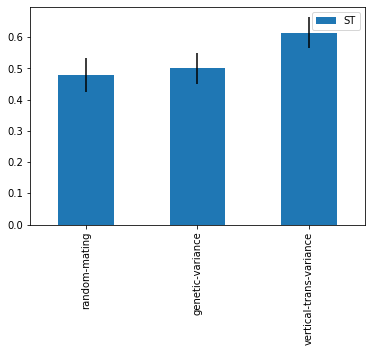

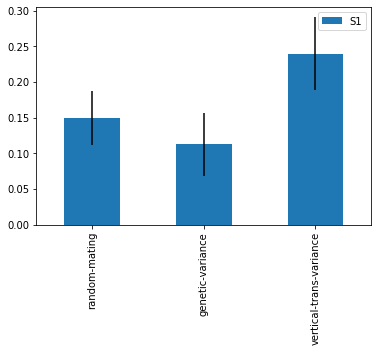

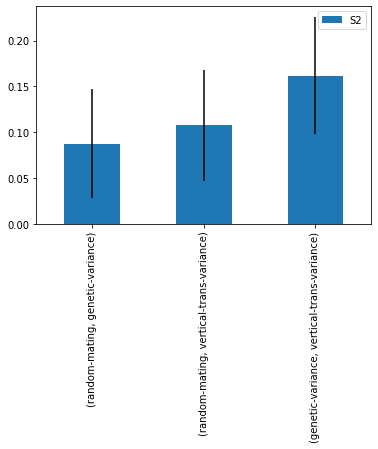

In [8]:
sb = Sensitivity(problem, df['sd_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-vt-sobol-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'avearge bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

sav['sb_sd_s1'] =  sb.tabval('S1')
sav['sb_sd_s2'] =  sb.tabval('S2')
sav['sb_sd_st'] =  sb.tabval('ST')

# save output
v = sb.createRows(sav, g=['s1', 's2', 'st'])
joblib.dump(v, 'sobol-snp-vt.pkl')